In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

R = 8.3144598 # units of J K−1 mol−1
c = 5.0/3.0 # ideal gas...is this correct??

T_hot = 600.
T_cold = 200.


In [2]:
def equilibium_process(device, volume_path, volume_history, pressure_history, compression=True, adiabatic=False):
    for steps in range(len(volume_path)):
        if compression: device.change_volume(-dV)
        else: device.change_volume(+dV)
        volume_history.append(device.V)
        pressure_history.append(device.P)
    return volume_history, pressure_history

In [3]:
class Cylinder:
    
    name = 'Engine'  # what does it mean when there is a variable here?
    
    def __init__(self, N=1.0, T=300.0, V=1.0, c=5.0/3.0, x=True):
        self.N = N  # number of moles of gas
        self.T = T  # temperature of gas in K
        self.V = V  # volume
        self.c = c  # type of gas
        
        self.__x = x # this is a private variable, not generally considered Pythonic
        self.__update_state__() # call the private method to update other variables
  
    def __update_state__(self):
        # PV = N R T
        self.P = (self.N*R*self.T)/self.V 
        self.U = self.c*self.N*self.T
        
# apply an incrimental update
        
    def change_volume(self, dV):
        self.V += dV
        self.__update_state__()
        
    def change_temperature(self, dT):
        self.T += dT
        self.__update_state__()
        
    def change_volume2(self, dV, adiabatic):
        self.V += dV
        if adiabatic:
            print('adiabatic compression')
            #TODO: fix this
            self.__update_state__()
        else: 
            self.__update_state__()


    def equilibium_process(self, volume_history, pressure_history, volume_path, compression=True, adiabatic=False):
        for steps in range(len(volume_path)):
            if compression:
                self.change_volume2(-dV, adiabatic)
            else:
                self.change_volume2(+dV, adiabatic)
            volume_history.append(self.V)
            pressure_history.append(self.P)
        return volume_history, pressure_history

        
# go directly to a point in phase space, not a real process

    def set_volume(self, V):
        self.V = V
        self.__update_state__()

        
    def set_temperature(self, T):
        self.T = T
        self.__update_state__()
        
    def get_x(self): # I need a getter to work with private variables
        return self.__x

    def set_x(self, x): # I need a setter to work with private variables
        self.__x = x

In [4]:
myCylinder = Cylinder()

In [5]:
print(myCylinder.V, myCylinder.P, myCylinder.T)

1.0 2494.33794 300.0


In [6]:
vmax = 10. # the largest volume a cylinder can be
vmin = 0. # complete compression of the cylinder is possible
vend = 1.0 #TODO: for now set an effective minimum volume...really it should blow up at some point 
dV = 0.1

In [7]:
# begin the cycle
myCylinder.set_volume(10.)
myCylinder.set_temperature(T_cold) # place in a bath of ice water

volume_record = [myCylinder.V] # track the simulation for plotting
pressure_record = [myCylinder.P]

print('Starting at ', myCylinder.V, myCylinder.P, myCylinder.T)

Starting at  10.0 166.289196 200.0


In [8]:
# volume path to use for step 1
volume_path = [i for i in np.arange(vmax, vend, -dV)] # compression stroke

# dU = dQ + dW
u_initial = myCylinder.U
volume_record, pressure_record = myCylinder.equilibium_process(volume_record, pressure_record, volume_path, compression=True, adiabatic=False)
u_final= myCylinder.U

print('At the end of step I, I am here: ', myCylinder.V, myCylinder.P, myCylinder.T)


At the end of step I, I am here:  1.0000000000000187 1662.891959999969 200.0


In [9]:
# step 2
# dU = dQ + dW

# here, dV = 0, so no work is done, therefore, the required for this step is just dU
dW = 0

u_initial = myCylinder.U
myCylinder.set_temperature(T_hot) # heat to Thot 
volume_record.append(myCylinder.V)
pressure_record.append(myCylinder.P)  # update the pressure
u_final= myCylinder.U

dQ = u_final - u_initial

print('At the end of step II: ', myCylinder.V, myCylinder.P, myCylinder.T)
print('Heat: ', dQ)
print('Work: ', dW)


At the end of step II:  1.0000000000000187 4988.675879999907 600.0
Heat:  666.6666666666666
Work:  0


In [10]:
# volume path to use for step 3

# dU = dQ + dW

# here, dV = 0, so no work is done, therefore, the required for this step is just dU

volume_path = volume_path[::-1] # reverse the path

volume_record, pressure_record = myCylinder.equilibium_process(volume_record, pressure_record, volume_path, compression=False, adiabatic=False)


print('At the end of step III: ', myCylinder.V, myCylinder.P, myCylinder.T)

At the end of step III:  10.0 498.86758799999996 600.0


In [11]:
# volume path to use for step 4

In [12]:
myCylinder.set_temperature(T_cold) # cool to Tcold
volume_record.append(myCylinder.V)
pressure_record.append(myCylinder.P)  
print('At the end of step IV: ', myCylinder.V, myCylinder.P, myCylinder.T)

At the end of step IV:  10.0 166.289196 200.0


<IPython.core.display.Javascript object>


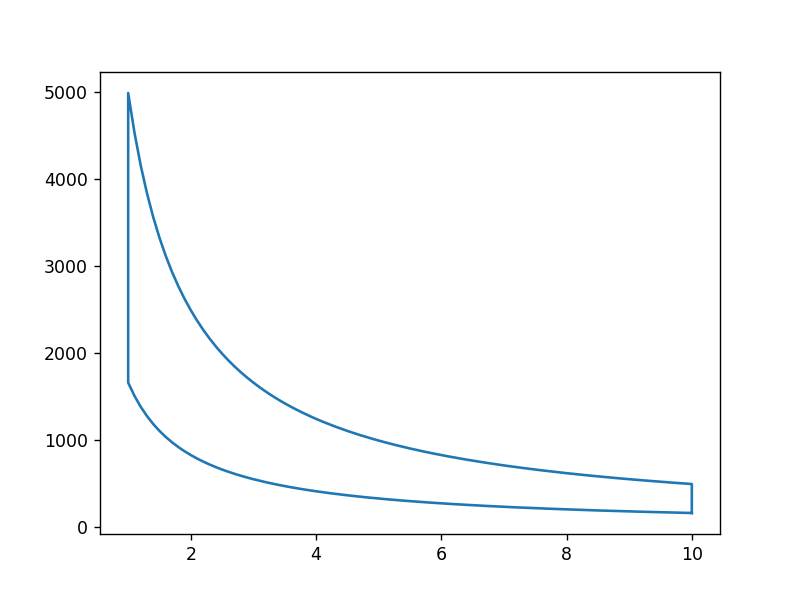

In [13]:
line = plt.figure()

plt.plot(volume_record, pressure_record)